In [1]:
import pandas as pd
import tushare as ts
import akshare as ak


 ## 我们先通过tushare和akshare获取我们所需要的3类数据：
 1. 其中一类是1只股票短时间（几天内）的每天的数据。
 2. 第二类是2只股票在半年里面的每天的数据
 3. 第三类是1只股票近期每分钟的数据

In [2]:
# 一只股票短时间数据data1
def get_data1():
    pro = ts.pro_api('4fcc5bd1890c228a9df404fcc3bddfc4ec11471a26a5db2e4cadf53f')
    df = pro.daily(ts_code='000001.SZ', start_date='20200701', end_date='20200730')
    df = pd.DataFrame(df)
    df = df.dropna()
    df.head()
    df.to_csv('firstStock.csv')
    print(df)


In [3]:
# 两只股票半年数据data2
def get_data2():
    pro = ts.pro_api('4fcc5bd1890c228a9df404fcc3bddfc4ec11471a26a5db2e4cadf53f')
    df = pro.daily(ts_code='000001.SZ,600000.SH,', start_date='20180101', end_date='20180630')
    df = pd.DataFrame(df)
    df = df.dropna()
    df.head()
    df.to_csv('secondStock.csv')
    print(df)


In [4]:
# 1只股票分钟数据data3
def get_data3():
    stock_zh_a_minute_df = ak.stock_zh_a_minute(symbol='sh000300', period='1')
    df = pd.DataFrame(stock_zh_a_minute_df)
    df.dropna()
    df.head()
    df.to_csv('thirdStock.csv')


In [5]:
# 得到三种数据，并写入到csv里面
get_data1()
get_data2()
get_data3()


ts_code trade_date   open   high    low  close  pre_close  change  \
0   000001.SZ   20200730  13.50  13.51  13.37  13.37      13.54   -0.17   
1   000001.SZ   20200729  13.35  13.63  13.21  13.54      13.34    0.20   
2   000001.SZ   20200728  13.34  13.43  13.18  13.34      13.24    0.10   
3   000001.SZ   20200727  13.67  13.68  13.10  13.24      13.50   -0.26   
4   000001.SZ   20200724  13.97  13.99  13.42  13.50      14.01   -0.51   
..        ...        ...    ...    ...    ...    ...        ...     ...   
17  000001.SZ   20200707  16.30  16.63  15.03  15.48      15.68   -0.20   
18  000001.SZ   20200706  14.60  15.68  14.59  15.68      14.25    1.43   
19  000001.SZ   20200703  13.57  14.32  13.56  14.25      13.43    0.82   
20  000001.SZ   20200702  13.08  13.49  12.97  13.43      13.12    0.31   
21  000001.SZ   20200701  12.79  13.15  12.74  13.12      12.80    0.32   

    pct_chg         vol       amount  
0   -1.2555   964067.63  1294444.933  
1    1.4993  1519580.25  20

In [6]:
# 第一部分数据
data = pd.read_csv('firstStock.csv')
df = pd.DataFrame(data)


 ## 上面我们获取了三组数据，并且已经打开了第一组数据，接下来我们要绘制这一数据折线图和涨幅图，从而判断股票的走势，我们定义draw函数，里面包含了该数据的可视化呈现。

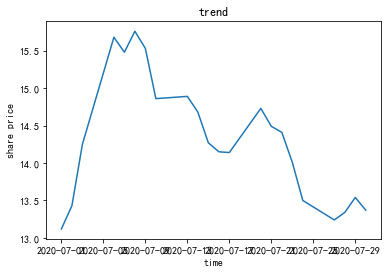

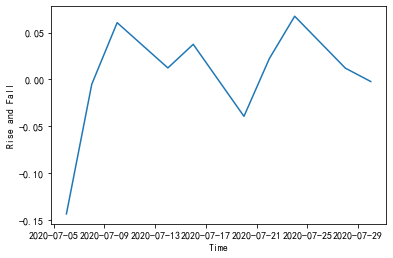

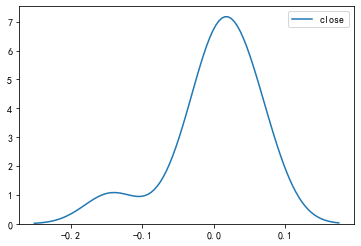

In [7]:
def draw(df):
    from matplotlib import pyplot as plt
    import pandas as pd
    import seaborn as sns
    raw_time = pd.to_datetime(df.pop('trade_date'), format='%Y%m%d')
    raw_time.head()
    plt.plot(raw_time, df['close'])
    plt.xlabel('time')
    plt.ylabel('share price')
    plt.title('trend')
    plt.show()
    daily_return = df['close'][0::2].pct_change().dropna()
    plt.plot(raw_time[0::2][:10], daily_return[:10])
    plt.xlabel('Time')
    plt.ylabel('Rise and Fall')
    plt.show()
    sns.kdeplot(daily_return)

draw(df)


 ## 针对第一组数据，我们还进行了对开，高，低，收等指数进行相关系数的获取，并绘制出了相关系数热力图，方便我们能直观感受数据之间的内在联系。

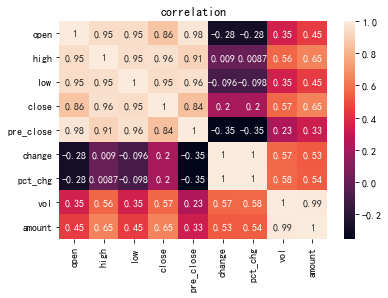

,open,high,low,close,pre_close,change,pct_chg,vol,amount
open,1.000000,0.950034,0.949151,0.862393,0.977010,-0.280075,-0.280570,0.351138,0.446918
high,0.950034,1.000000,0.953672,0.958829,0.910869,0.008989,0.008718,0.564568,0.649966
low,0.949151,0.953672,1.000000,0.947694,0.957688,-0.095960,-0.098368,0.349802,0.445287
close,0.862393,0.958829,0.947694,1.000000,0.844161,0.202670,0.201344,0.569665,0.649728
pre_close,0.977010,0.910869,0.957688,0.844161,1.000000,-0.353878,-0.354698,0.233108,0.329445
change,-0.280075,0.008989,-0.095960,0.202670,-0.353878,1.000000,0.999185,0.568062,0.531772
pct_chg,-0.280570,0.008718,-0.098368,0.201344,-0.354698,0.999185,1.000000,0.576652,0.539050
vol,0.351138,0.564568,0.349802,0.569665,0.233108,0.568062,0.576652,1.000000,0.993108
amount,0.446918,0.649966,0.445287,0.649728,0.329445,0.531772,0.539050,0.993108,1.000000


In [8]:
def cor_data1(df):
    from matplotlib import pyplot as plt
    import pandas as pd
    import seaborn as sns
    df['ts_code'] = pd.to_datetime(df.pop('Unnamed: 0'))
    a = df.corr()
    sns.heatmap(a, annot=True)
    plt.title('correlation')
    plt.show()
    return a

cor_data1(df)


In [9]:
# 第二部分数据
data = pd.read_csv('secondStock.csv')
df = pd.DataFrame(data)


 ## 来到了第二部分数据，这一部分数据包含了2支股票的半年的数据，数据量比较大，2支股票数据也交替在了一起，所以得先对2支股票各自的数据进行分开处理。处理完后，我们绘制2支股票的折线图。

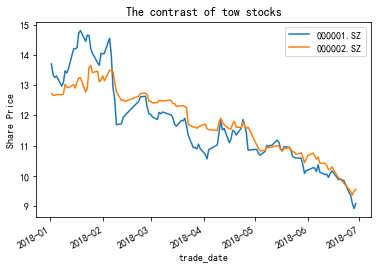

In [10]:
def plotContrast(df):
    "对比两只股票close的变化"

    from matplotlib import pyplot as plt
    import pandas as pd

    df['trade_date'] = pd.to_datetime(df.pop('trade_date'), format='%Y%m%d')
    sz1 = df[::2].set_index('trade_date')  # 第一支股票
    sz2 = df[1::2].set_index('trade_date')  # 第二支股票
    fig, ax = plt.subplots()
    sz1.plot(ax=ax, y='close', label='000001.SZ')
    sz2.plot(ax=ax, y='close', label='000002.SZ')
    plt.ylabel('Share Price')
    plt.title('The contrast of tow stocks')
    plt.legend(loc='upper right')

plotContrast(df)


In [11]:
# ## 绘制好上述2支股票的折线图之后，我们继续对数据进行可视化分析，我们绘制K线图，绘制出类似现实中我们看到的股票那样的图像。

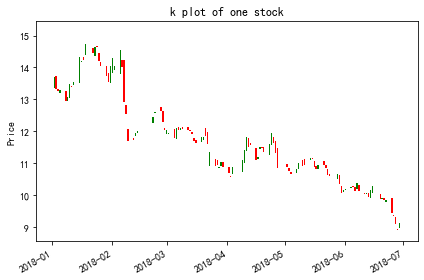

In [12]:
def plotKline(sz):
    "绘制k线图，红色表示下跌，绿色表示上涨"

    from matplotlib import pyplot as plt
    sz = sz[::2]  # 绘制第一支股票的k线图
    fig, ax = plt.subplots()
    thick_width = 0.7
    thin_width = 0.1
    price_up = sz[sz['close'] >= sz['open']]  # 股票价格上涨
    price_down = sz[sz['close'] < sz['open']]  # 股票价格下跌

    plt.bar(price_up['trade_date'], price_up['close'] - price_up['open'], thick_width, bottom=price_up['open'],
            color='g')
    plt.bar(price_up['trade_date'], price_up['high'] - price_up['close'], thin_width, bottom=price_up['close'],
            color='g')
    plt.bar(price_up['trade_date'], price_up['low'] - price_up['open'], thin_width, bottom=price_up['open'], color='g')

    plt.bar(price_down['trade_date'], price_down['open'] - price_down['close'], thick_width, bottom=price_down['close'],
            color='r')
    plt.bar(price_down['trade_date'], price_down['high'] - price_down['open'], thin_width, bottom=price_down['open'],
            color='r')
    plt.bar(price_down['trade_date'], price_down['low'] - price_down['close'], thin_width, bottom=price_down['close'],
            color='r')

    plt.ylabel('Price')
    plt.title('k plot of one stock')
    fig.autofmt_xdate()
    fig.tight_layout()

    plt.show()

plotKline(df)


 ## 接着，类似，我们仍然绘制多种指数的相关矩阵及其热力图，在这里，我们也需要将第一支和第二支股票分开进行处理。

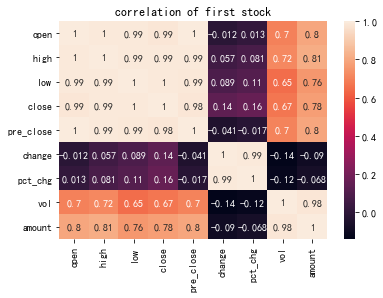

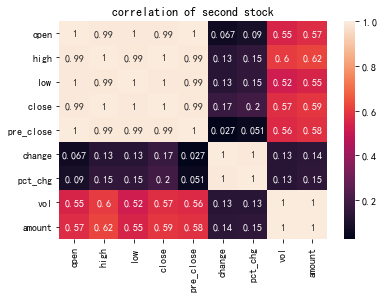

In [13]:
def cor_data2(df):
    from matplotlib import pyplot as plt
    import pandas as pd
    import seaborn as sns
    df['trade_date'] = pd.to_datetime(df.pop('trade_date'), format='%Y%m%d')
    df['ts_code'] = pd.to_datetime(df.pop('Unnamed: 0'))
    sz1 = df[::2].set_index('trade_date')
    sz2 = df[1::2].set_index('trade_date')
    correlation1 = sz1.corr()
    correlation2 = sz2.corr()
    sns.heatmap(correlation1, annot=True)
    plt.title('correlation of first stock')
    plt.show()
    sns.heatmap(correlation2, annot=True)
    plt.title('correlation of second stock')
    plt.show()

cor_data2(df)


In [14]:
# 第三部分数据
data = pd.read_csv('thirdStock.csv')
df = pd.DataFrame(data)
print(df)


Unnamed: 0                  day      open      high       low     close  \
0              0  2020-08-10 13:53:00  4734.095  4735.694  4734.095  4735.694   
1              1  2020-08-10 13:54:00  4735.610  4737.348  4735.597  4737.348   
2              2  2020-08-10 13:55:00  4737.661  4739.374  4737.549  4739.374   
3              3  2020-08-10 13:56:00  4739.100  4741.636  4739.029  4741.636   
4              4  2020-08-10 13:57:00  4741.650  4742.204  4741.650  4741.960   
...          ...                  ...       ...       ...       ...       ...   
1018        1018  2020-08-14 14:55:00  4705.759  4705.759  4703.488  4703.716   
1019        1019  2020-08-14 14:56:00  4703.258  4703.258  4701.793  4701.793   
1020        1020  2020-08-14 14:57:00  4701.986  4704.168  4701.975  4703.668   
1021        1021  2020-08-14 14:58:00  4703.505  4703.530  4703.505  4703.530   
1022        1022  2020-08-14 15:00:00  4703.530  4704.629  4703.530  4704.629   

         volume  ma_price5  ma_vo

 ## 现在针对第三部分的数据，数据是逐分钟进行列出的，因此，方便我们进行MA（移动平均线），MACD（异同移动平均线）,RSI(相对强弱指标)进行绘制与分析。

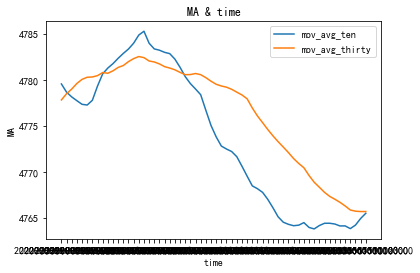

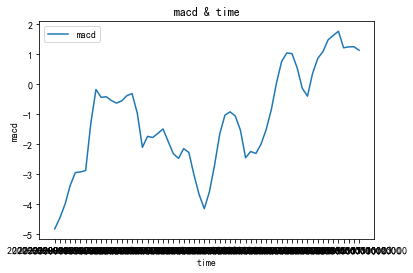

day     volume
100  2020-08-11 10:04:00  102763900
101  2020-08-11 10:05:00  103583200
102  2020-08-11 10:06:00   97712300
103  2020-08-11 10:07:00   89369500
104  2020-08-11 10:08:00   81480100
..                   ...        ...
155  2020-08-11 10:59:00   39400200
156  2020-08-11 11:00:00   47379500
157  2020-08-11 11:01:00   47404400
158  2020-08-11 11:02:00   36236300
159  2020-08-11 11:03:00   37581400

[60 rows x 2 columns]


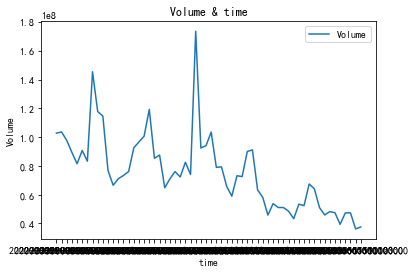

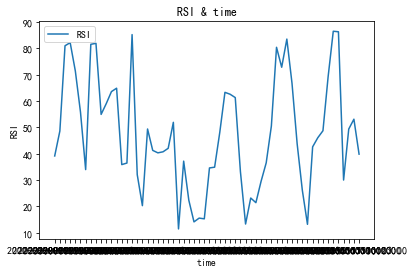

In [15]:
def moving_average(plot_mat):
    "plot_mat为整理后的表格。"

    mov_avg_ten = plot_mat['close'].rolling(window=10).mean()  # 计算每10天的收盘价的均值，每次向下滚动一天
    mov_avg_thirty = plot_mat['close'].rolling(window=30).mean()  # 计算每30天的收盘价的均值，每次向下滚动一天
    return mov_avg_ten, mov_avg_thirty


def plot_MA(plot_mat, mov_avg_ten, mov_avg_thirty):
    from matplotlib import pyplot as plt
    plt.plot(plot_mat.day[100:160], mov_avg_ten[100:160], label='mov_avg_ten')
    plt.plot(plot_mat.day[100:160], mov_avg_thirty[100:160], label='mov_avg_thirty')
    plt.xlabel('time')
    plt.ylabel('MA')
    plt.title('MA & time')
    plt.legend()
    plt.show()


def cal_ema(df0, period, is_dea=False):
    '''
    df0为整理后的表格,
    is_dea用来确认是否是DEA.
    '''

    for i in range(len(df0)):
        if not is_dea:
            if i == 0:
                df0.loc[i, 'ema' + str(period)] = df0.loc[i, 'close']  # EMA初始值为当天收盘价
            else:
                df0.loc[i, 'ema' + str(period)] = (2 * df0.loc[i, 'close'] + (period - 1) * df0.loc[
                    i - 1, 'ema' + str(period)]) / (period + 1)
            ema = df0['ema' + str(period)]
        else:
            if i == 0:
                df0.loc[i, 'dea' + str(period)] = df0.loc[i, 'dif']
            else:
                df0.loc[i, 'dea' + str(period)] = ((period - 1) * df0.loc[i - 1, 'dea' + str(period)] + 2 * df0.loc[
                    i, 'dif']) / (period + 1)
            ema = df0['dea' + str(period)]
    return ema


def cal_macd(df0, short=12, long=26, m=9):
    '''
        df0为整理后的表格,
        short,long分别指12天，26天,
        m默认为9
        '''
    short_ema = cal_ema(df0, short)  # 计算12日EMA
    long_ema = cal_ema(df0, long)  # 计算26日EMA
    df0['dif'] = short_ema - long_ema  # 计算DIF
    dea = cal_ema(df0, m, is_dea=True)  # 计算DEA
    df0['macd'] = 2 * (df0['dif'] - df0['dea' + str(m)])  # 计算MACD
    return df0


def plot_macd(plot_mat):
    from matplotlib import pyplot as plt

    plt.plot(plot_mat.day[100:160], plot_mat.macd[100:160], label='macd')
    plt.xlabel('time')
    plt.ylabel('macd')
    plt.title('macd & time')
    plt.legend()
    plt.show()


def Volume(data_):
    "data_为前文深度copy所得到表格。"

    Volume = data_[['day', 'volume']].groupby(by='day').sum().reset_index()
    return Volume


def plot_Volume(plot_mat):
    from matplotlib import pyplot as plt

    plt.plot(plot_mat.day[100:160], plot_mat.volume[100:160], label='Volume')
    plt.xlabel('time')
    plt.ylabel('Volume')
    plt.title('Volume & time')
    plt.legend()
    plt.show()


def cal_rsi(df0, period=6):  # 默认周期为6日

    """
    df0为整理后的表格，
    period为周期，默认为6。
    """

    df0['diff'] = df0['close'] - df0['close'].shift(1)  # 用diff存储两天收盘价的差
    df0['diff'].fillna(0, inplace=True)  # 空值填充为0
    df0['up'] = df0['diff']  # diff赋值给up
    df0['down'] = df0['diff']  # diff赋值给down
    df0['up'][df0['up'] < 0] = 0  # 把up中小于0的置零
    df0['down'][df0['down'] > 0] = 0  # 把down中大于0的置零
    df0['avg_up'] = df0['up'].rolling(period).sum() / period  # 计算period天内平均上涨点数
    df0['avg_down'] = abs(df0['down'].rolling(period).sum() / period)  # 计算period天内平均下降点数
    df0['avg_up'].fillna(0, inplace=True)  # 空值填充为0
    df0['avg_down'].fillna(0, inplace=True)  # 空值填充为0
    df0['rsi'] = 100 - 100 / (1 + (df0['avg_up'] / df0['avg_down']))  # 计算RSI
    return df0  # 返回原DataFrame


def plot_rsi(plot_mat):
    from matplotlib import pyplot as plt

    plt.plot(plot_mat.day[100:160], plot_mat.rsi[100:160], label='RSI')
    plt.xlabel('time')
    plt.ylabel('RSI')
    plt.title('RSI & time')
    plt.legend()
    plt.show()

df['close'] = df['close'].astype('float')
df = cal_macd(df)
Volume = Volume(df)
df = cal_rsi(df)
avg = moving_average(df)
plot_MA(df, avg[0], avg[1])
plot_macd(df)
print(Volume[100:160])
plot_Volume(df)
plot_rsi(df)


 ## 将上述的几个关键因子绘图后，我们可以得到以下的结论：
 1. MA ：MA & time图可以看出10MA线变化趋势为先下降后上升再下降，30MA线的变化趋势为先上升再下降，两种MA线的总体趋势都是向下降。此时有较大概率证券价格线高于MA线，股民可以考虑买入。
 2. MACD：当MACD从负数转向正数，是买的信号。当MACD从正数转向负数，是卖的信号。当MACD以大角度变化，表示快的移动平均线和慢的移动平均线的差距非常迅速的拉开，代表了一个市场大趋势的转变。由图中可以看出，在所选区域的中间阶段，MACD线总体呈现上升趋势，应考虑买入。
 3. Volume:由图中可以看出，所选的时间段内，Volume即交易总量随时间推移不断上升。
 4. RSI：RSI值如果超过50,表明市场进入强市,可以考虑买入,但是如果继续进入"极强"区,就要考虑物极必反,准备卖出了。同理RSI值在50以下也是如此,如果进入了"极弱"区,则表示超卖,应该伺机买入。由图中可以看出，股票在“极强”和“极弱”区停留时间较少，但是其变化趋势较大，建议观望。

 ## 在相关因数分析出来之后，我们绘制基本的散点图，箱型图。看看整体上面有没有什么关系

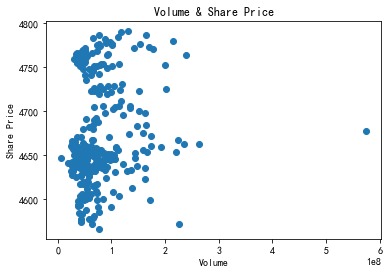

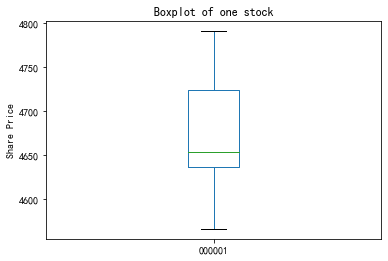

In [16]:
def plotScatter(df):
    "绘制散点图，横轴为volume，纵轴为close"

    from matplotlib import pyplot as plt

    plt.scatter(df['volume'][::3], df['close'][::3])
    plt.xlabel('Volume')
    plt.ylabel('Share Price')
    plt.title('Volume & Share Price')
    plt.show()


def plotBox(df):
    "绘制箱型图"

    import pandas as pd
    from matplotlib import pyplot as plt

    closedf = pd.DataFrame()
    closedf = pd.concat([closedf, df['close']])
    closedf.columns = ['000001']
    closedf.plot(kind='box')
    plt.ylabel('Share Price')
    plt.title('Boxplot of one stock')

plotScatter(df)
plotBox(df)


 ## 同样我们也将所有的相关指数进行相关系数的分析，看看不同指数之间的相关程度是否密切。

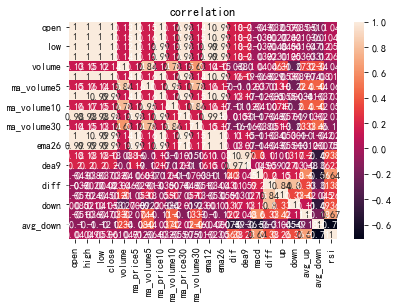

,open,high,low,close,volume,ma_price5,ma_volume5,ma_price10,ma_volume10,ma_price30,...,ema26,dif,dea9,macd,diff,up,down,avg_up,avg_down,rsi
open,1.000000,0.999348,0.999409,0.998382,0.133484,0.998642,0.153185,0.995447,0.157670,0.978179,...,0.986844,0.177480,0.197917,-0.042862,-0.031580,-0.056961,0.008498,-0.050506,-0.104100,0.040230
high,0.999348,1.000000,0.999201,0.999440,0.146311,0.998328,0.161984,0.995082,0.166247,0.977770,...,0.986536,0.177495,0.196525,-0.037742,-0.002701,-0.023506,0.021233,-0.035606,-0.104822,0.049263
low,0.999409,0.999201,1.000000,0.999325,0.123016,0.998085,0.143585,0.994570,0.149012,0.976679,...,0.985537,0.183167,0.202212,-0.036789,-0.004837,-0.045124,0.041360,-0.047000,-0.120908,0.052836
close,0.998382,0.999440,0.999325,1.000000,0.136916,0.997471,0.153073,0.993952,0.157900,0.976100,...,0.985021,0.182536,0.200333,-0.032360,0.023404,-0.012115,0.053490,-0.033148,-0.120999,0.060700
volume,0.133484,0.146311,0.123016,0.136916,1.000000,0.137483,0.836954,0.141037,0.776189,0.146882,...,0.149142,-0.087511,-0.102853,0.040299,0.045971,0.314853,-0.267610,0.319857,0.343680,-0.046682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
up,-0.056961,-0.023506,-0.045124,-0.012115,0.314853,-0.052993,0.177321,-0.054813,0.172329,-0.057124,...,-0.054696,0.013155,-0.027076,0.148750,0.835479,1.000000,0.333076,0.419880,-0.044605,0.260997
down,0.008498,0.021233,0.041360,0.053490,-0.267610,0.008940,-0.216898,-0.000343,-0.202399,-0.019405,...,-0.013460,0.172715,0.131842,0.179423,0.796423,0.333076,1.000000,0.110433,-0.487095,0.363000
avg_up,-0.050506,-0.035606,-0.047000,-0.033148,0.319857,-0.073507,0.402484,-0.108462,0.404629,-0.132878,...,-0.117947,0.201454,0.047639,0.595565,0.333655,0.419880,0.110433,1.000000,-0.183608,0.665831
avg_down,-0.104100,-0.104822,-0.120908,-0.120999,0.343680,-0.079781,0.436678,-0.036791,0.417801,0.019838,...,-0.000752,-0.491707,-0.361711,-0.560421,-0.312487,-0.044605,-0.487095,-0.183608,1.000000,-0.714487


In [17]:
def cor_data3(df):
    from matplotlib import pyplot as plt
    import pandas as pd
    import seaborn as sns
    df['day'] = pd.to_datetime(df.pop('day'))
    df['ts_code'] = pd.to_datetime(df.pop('Unnamed: 0'))
    a = df.corr()
    sns.heatmap(a, annot=True)
    plt.title('correlation')
    plt.show()
    return a

cor_data3(df)

